In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(11.7,8.27)})

TEST_TIMEOUT = 60

In [29]:
df = pd.read_csv("../data/packet_size.csv", header=0)

df['packet size'] = df['packet size'].astype(int)

# take the average values for each switch x packet size 
avg_df = df.groupby(['switch', 'packet size']).mean()

# # dont need trial no. anymore 
avg_df = avg_df.drop('trial', axis=1)

avg_df = avg_df.reset_index()

# set messages/sec to be messages sent / TEST TIMEOUT 
avg_df['messages/sec'] = avg_df['number of messages'] / TEST_TIMEOUT

avg_df = avg_df.rename(columns={"packet size":"packet size (bytes)",
                               })

In [30]:
avg_df

switch  packet size (bytes)  total test time  number of messages  \
0       ovs                    20       119.206667        1.874913e+07   
1       ovs                    64       107.510000        1.251421e+07   
2       ovs                   100        94.543333        8.507180e+06   
3       ovs                   500        76.859157        1.564908e+06   
4       ovs                  1000        75.673824        7.830997e+05   
5       ovs                  1500        74.722738        5.222177e+05   
6   ovs-dpdk                   20       119.020000        1.774598e+07   
7   ovs-dpdk                   64       105.543333        1.412827e+07   
8   ovs-dpdk                  100        86.603333        8.461836e+06   
9   ovs-dpdk                  500        67.673333        1.562495e+06   
10  ovs-dpdk                 1000        63.826667        7.833313e+05   
11  ovs-dpdk                 1500        61.526667        5.221637e+05   

    messages per sec  send, probe data interval (usec)  \
0      157260.459033                               1.0   
1      116435.543100                               4.0   
2       89984.801870                               7.0   
3       20361.596197                              38.0   
4       10348.415247                              76.0   
5        6988.740204                             114.0   
6      149111.563433                               1.0   
7      134420.058133                               4.0   
8       97807.000523                               7.0   
9       23095.486877                              38.0   
10      12272.951937                              76.0   
11       8486.787280                             114.0   

    avg send message time (s)   messages/sec  
0                4.843333e-07  312485.455556  
1                3.436667e-06  208570.238889  
2                6.716667e-06  141786.327778  
3                3.793333e-05   26081.800000  
4                7.556667e-05   13051.661111  
5                1.130000e-04    8703.627778  
6                4.139333e-07  295766.377778  
7                3.943333e-06  235471.094444  
8                6.670000e-06  141030.594444  
9                3.743333e-05   26041.583333  
10               7.550000e-05   13055.522222  
11               1.140000e-04    8702.727778

In [31]:
# set log cols: 
LOG_COLS = ['number of messages', 
            'messages per sec', 
            'send, probe data interval (usec)', 
            'avg send message time (s)']

for lc in LOG_COLS: 
    print(lc)
    avg_df[f'{lc}_log'] = np.log10(avg_df[f'{lc}']) 

number of messages
messages per sec
send, probe data interval (usec)
avg send message time (s)


In [32]:
avg_df.head()

switch  packet size (bytes)  total test time  number of messages  \
0   ovs                    20       119.206667        1.874913e+07   
1   ovs                    64       107.510000        1.251421e+07   
2   ovs                   100        94.543333        8.507180e+06   
3   ovs                   500        76.859157        1.564908e+06   
4   ovs                  1000        75.673824        7.830997e+05   

   messages per sec  send, probe data interval (usec)  \
0     157260.459033                               1.0   
1     116435.543100                               4.0   
2      89984.801870                               7.0   
3      20361.596197                              38.0   
4      10348.415247                              76.0   

   avg send message time (s)   messages/sec  number of messages_log  \
0               4.843333e-07  312485.455556                7.272981   
1               3.436667e-06  208570.238889                7.097404   
2               6.716667e-06  141786.327778                6.929786   
3               3.793333e-05   26081.800000                6.194489   
4               7.556667e-05   13051.661111                5.893817   

   messages per sec_log  send, probe data interval (usec)_log  \
0              5.196620                              0.000000   
1              5.066086                              0.602060   
2              4.954169                              0.845098   
3              4.308812                              1.579784   
4              4.014874                              1.880814   

   avg send message time (s)_log  
0                      -6.314856  
1                      -5.463863  
2                      -5.172846  
3                      -4.420979  
4                      -4.121670

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


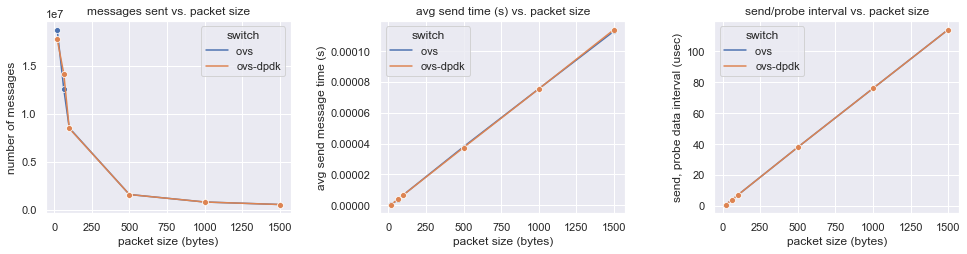

In [33]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
messages_sec = sns.lineplot(
    data=avg_df, 
    y='number of messages',
    x="packet size (bytes)",
    hue='switch',
    marker='o', 
    ax=ax[0],
    ci=None).set_title('messages sent vs. packet size')

avg_send_time = sns.lineplot(
    data=avg_df, 
    y='avg send message time (s)',
    x="packet size (bytes)",
    hue='switch',
    marker='o',
    ax=ax[1],
    ci=None).set_title('avg send time (s) vs. packet size')

interval = sns.lineplot(
    data=avg_df, 
    y='send, probe data interval (usec)',
    x="packet size (bytes)",
    hue='switch',
    marker='o',
    ax=ax[2],
    ci=None).set_title('send/probe interval vs. packet size')

fig.tight_layout(pad=2.0)
fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


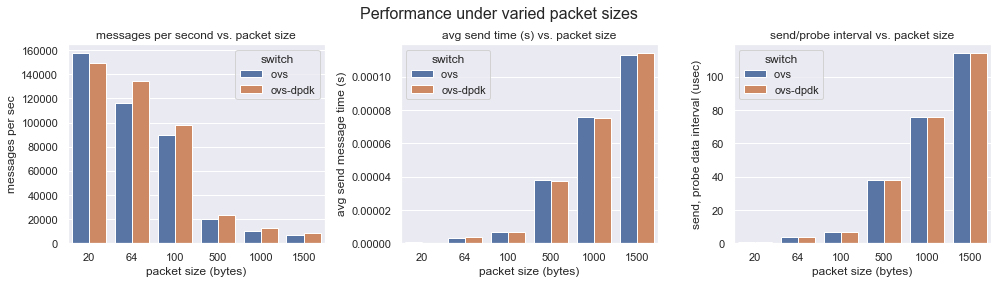

In [36]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
messages_sec = sns.barplot(
    data=avg_df, 
    y='messages per sec',
    x="packet size (bytes)",
    hue='switch',
    ax=ax[0],
    ci=None).set_title('messages per second vs. packet size')

avg_send_time = sns.barplot(
    data=avg_df, 
    y='avg send message time (s)',
    x="packet size (bytes)",
    hue='switch',
    ax=ax[1],
    ci=None).set_title('avg send time (s) vs. packet size')

interval = sns.barplot(
    data=avg_df, 
    y='send, probe data interval (usec)',
    x="packet size (bytes)",
    hue='switch',
    ax=ax[2],
    ci=None).set_title('send/probe interval vs. packet size')


fig.suptitle('Performance under varied packet sizes', fontsize=16) # or plt.suptitle('Main title')
fig.tight_layout(pad=1.0)
fig.subplots_adjust(top=0.85)
fig.show()